In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
# Checking for missing values
print(df.isnull().sum())  # No missing values found

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [4]:
# Splitting dataset
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

- Logistic Regression: A statistical model that uses a sigmoid function to classify data into two categories. Suitable for this dataset because it is efficient and works well with binary classification problems.<br>
-  Decision Tree: A tree-based model that splits data based on feature conditions. Suitable because it can handle non-linear relationships and interpretability is high.<br>
- Random Forest: An ensemble learning method that builds multiple decision trees and averages the results. Suitable due to its high accuracy and robustness against overfitting.<br>
- SVM: A model that finds the optimal hyperplane to separate data points. Suitable because it performs well with high-dimensional datasets like this one.<br>
- KNN: A non-parametric algorithm that classifies based on the k-nearest neighbors. Suitable because it is simple and effective for well-separated classes.

In [7]:
# Training and Evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-"*50)


Logistic Regression Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[41  1]
 [ 1 71]]
--------------------------------------------------
Decision Tree Accuracy: 0.9123
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

[[39  3]
 [ 7 65]]
--------------------------------------------------
Random Forest Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        4

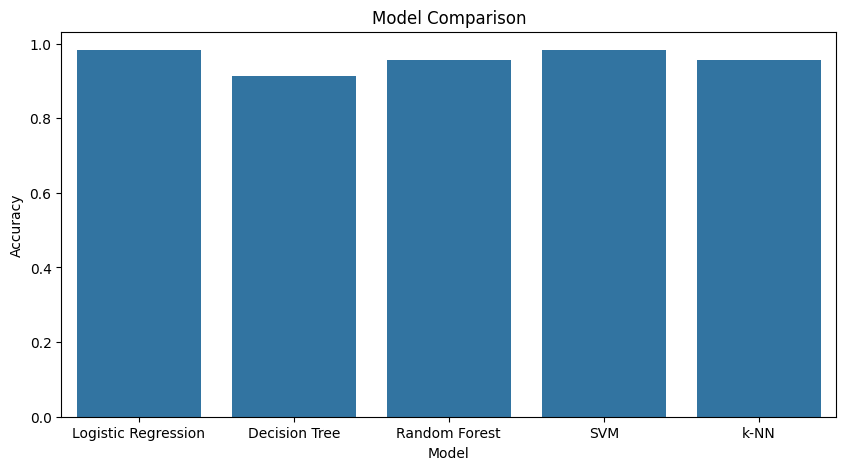

In [8]:
# Comparing Performance
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

In [9]:
# Determine Best and Worst Performing Models
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)

print(f"Best Performing Model: {best_model} with Accuracy {results[best_model]:.4f}")
print(f"Worst Performing Model: {worst_model} with Accuracy {results[worst_model]:.4f}")

Best Performing Model: Logistic Regression with Accuracy 0.9825
Worst Performing Model: Decision Tree with Accuracy 0.9123
